## **Applying Function Transformers :Log, Reciprocal,Square and Square Root ransformations(For Youtube Movies Dataset from Kaggle)**

In [40]:
import pandas as pd
import numpy as np

import scipy.stats as stats #For QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [41]:
data=pd.read_csv('/content/movies_youtube_sentiments.csv')

In [42]:
data.sample(10)

,name,trailer_link,video_id,sentiment_scores,favorability,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
840,The Wedding Ringer,https://www.youtube.com/watch?v=R3TeI9jPPuA,R3TeI9jPPuA,"{'positive': 108, 'neutral': 85, 'negative': 55}",0.662577,R,Comedy,2015,"January 16, 2015 (United States)",72000.0,Jeremy Garelick,Jeremy Garelick,Kevin Hart,United States,23000000.0,79799880.0,LStar Capital,101.0
9,Wedding Crashers,https://www.youtube.com/watch?v=GnD48PD84-8,GnD48PD84-8,"{'positive': 17, 'neutral': 21, 'negative': 10}",0.629630,R,Comedy,2005,"July 15, 2005 (United States)",339000.0,David Dobkin,Steve Faber,Owen Wilson,United States,40000000.0,288467645.0,New Line Cinema,119.0
369,Semi-Pro,https://www.youtube.com/watch?v=QdoODXShjss,QdoODXShjss,"{'positive': 0, 'neutral': 2, 'negative': 0}",0.000000,R,Comedy,2008,"February 29, 2008 (United States)",80000.0,Kent Alterman,Scot Armstrong,Will Ferrell,United States,55000000.0,44004502.0,New Line Cinema,91.0
481,The House of the Devil,https://www.youtube.com/watch?v=oM3NAtGR2qc,oM3NAtGR2qc,"{'positive': 60, 'neutral': 40, 'negative': 42}",0.588235,R,Horror,2009,"April 25, 2009 (Brazil)",42000.0,Ti West,Ti West,Jocelin Donahue,United States,900000.0,101215.0,MPI Media Group,95.0
418,The Taking of Pelham 123,https://www.youtube.com/watch?v=U2ke0QhSfoA,U2ke0QhSfoA,"{'positive': 11, 'neutral': 7, 'negative': 3}",0.785714,R,Action,2009,"June 12, 2009 (United States)",189000.0,Tony Scott,Brian Helgeland,Denzel Washington,United States,100000000.0,150166126.0,Columbia Pictures,106.0
31,Red Eye,https://www.youtube.com/watch?v=1YdzfduyXIA,1YdzfduyXIA,"{'positive': 46, 'neutral': 47, 'negative': 17}",0.730159,PG-13,Thriller,2005,"August 19, 2005 (United States)",115000.0,Wes Craven,Carl Ellsworth,Rachel McAdams,United States,26000000.0,96258201.0,Dreamworks Pictures,85.0
1000,The Mummy,https://www.youtube.com/watch?v=IjHgzkQM2Sg,IjHgzkQM2Sg,"{'positive': 103, 'neutral': 89, 'negative': 58}",0.639752,PG-13,Action,2017,"June 9, 2017 (United States)",177000.0,Alex Kurtzman,David Koepp,Tom Cruise,United States,125000000.0,409231607.0,Universal Pictures,110.0
104,The Fog,https://www.youtube.com/watch?v=ovNTb39_viI,ovNTb39_viI,"{'positive': 82, 'neutral': 50, 'negative': 51}",0.616541,R,Horror,1980,"February 8, 1980 (United States)",66000.0,John Carpenter,John Carpenter,Adrienne Barbeau,United States,1000000.0,21448782.0,AVCO Embassy Pictures,89.0
388,Red Cliff,https://www.youtube.com/watch?v=pd0bqLQrtdE,pd0bqLQrtdE,"{'positive': 104, 'neutral': 103, 'negative': 43}",0.707483,R,Action,2008,"December 4, 2009 (United States)",44000.0,John Woo,John Woo,Tony Chiu-Wai Leung,China,NaN,129710514.0,Beijing Film Studio,148.0
183,Click,https://www.youtube.com/watch?v=zZNC5emNyEQ,zZNC5emNyEQ,"{'positive': 102, 'neutral': 89, 'negative': 59}",0.633540,PG-13,Comedy,2006,"June 23, 2006 (United States)",313000.0,Frank Coraci,Steve Koren,Adam Sandler,United States,82500000.0,240685326.0,Columbia Pictures,107.0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1105 non-null   object 
 1   trailer_link      1105 non-null   object 
 2   video_id          1105 non-null   object 
 3   sentiment_scores  1105 non-null   object 
 4   favorability      1105 non-null   float64
 5   rating            1104 non-null   object 
 6   genre             1105 non-null   object 
 7   year              1105 non-null   int64  
 8   released          1105 non-null   object 
 9   votes             1105 non-null   float64
 10  director          1105 non-null   object 
 11  writer            1104 non-null   object 
 12  star              1105 non-null   object 
 13  country           1105 non-null   object 
 14  budget            901 non-null    float64
 15  gross             1105 non-null   float64
 16  company           1105 non-null   object 


In [44]:
data=pd.read_csv('/content/movies_youtube_sentiments.csv', usecols=['gross', 'budget',  'favorability' ])

In [45]:
data.sample(10)

,favorability,budget,gross
503,1.000000,6000000.0,7878856.0
143,0.750000,NaN,1266341.0
106,0.000000,30000000.0,58231520.0
660,0.787097,15000000.0,5072654.0
661,0.736842,10000000.0,18369.0
248,0.390374,18000000.0,57470220.0
838,0.638554,37000000.0,26250020.0
748,0.844828,25000000.0,172945750.0
84,0.792453,58000000.0,102854431.0
822,0.560241,95000000.0,114178613.0


In [46]:
data.isnull().sum()

favorability      0
budget          204
gross             0
dtype: int64

In [47]:
data.sample(4)

,favorability,budget,gross
474,0.806818,15000000.0,36020534.0
66,0.733333,30000000.0,49334775.0
690,0.754717,11000000.0,59520298.0
58,0.880000,53000000.0,95763716.0


In [48]:
data['budget'].fillna(data['budget'].mean(), inplace=True) #Filling the missing values in budget Col by budget's mean

In [49]:
data.isnull().sum()

favorability    0
budget          0
gross           0
dtype: int64

In [66]:
#Extracting X and y values for train-test split step
X=data.iloc[:, 0:2]
y=data.iloc[:, 2:3]

In [67]:
X

,favorability,budget
0,0.630435,1.500000e+08
1,0.689655,2.600000e+07
2,0.745342,8.500000e+07
3,0.830357,2.800000e+07
4,0.836601,1.500000e+08
...,...,...
1100,0.698324,7.000000e+06
1101,0.485294,1.000000e+06
1102,0.723926,1.200000e+08
1103,0.601942,4.306125e+07


In [68]:
y

,gross
0,896678241.0
1,177378645.0
2,162242962.0
3,121616555.0
4,373661946.0
...,...
1100,2584988.0
1101,16024987.0
1102,173961069.0
1103,1362536.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-70-04f28840bcfd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['favorability'])


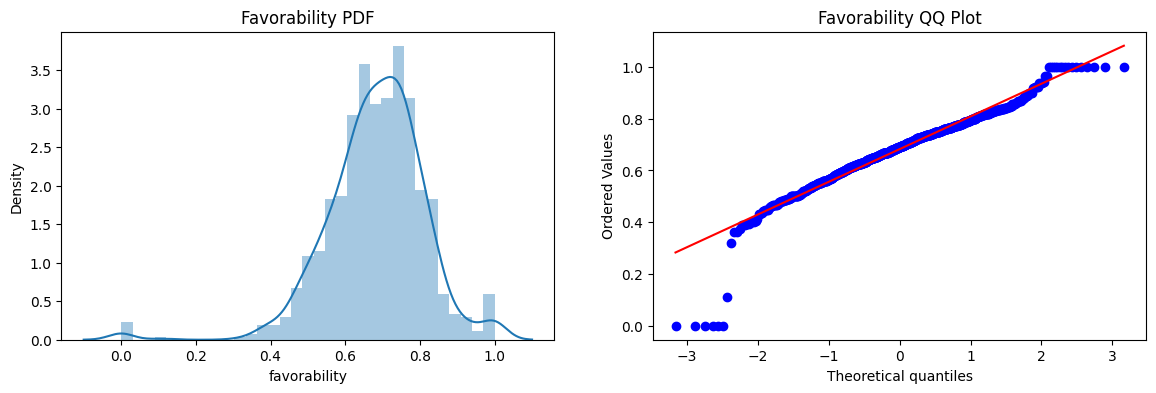

In [70]:
#To plot the Distribution and QQ plot before Transformation for favorability col.
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['favorability'])
plt.title('Favorability PDF')

plt.subplot(122)
stats.probplot(X_train['favorability'], dist="norm", plot=plt)
plt.title('Favorability QQ Plot')

plt.show()

<ipython-input-71-389804e9caca>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['budget'])


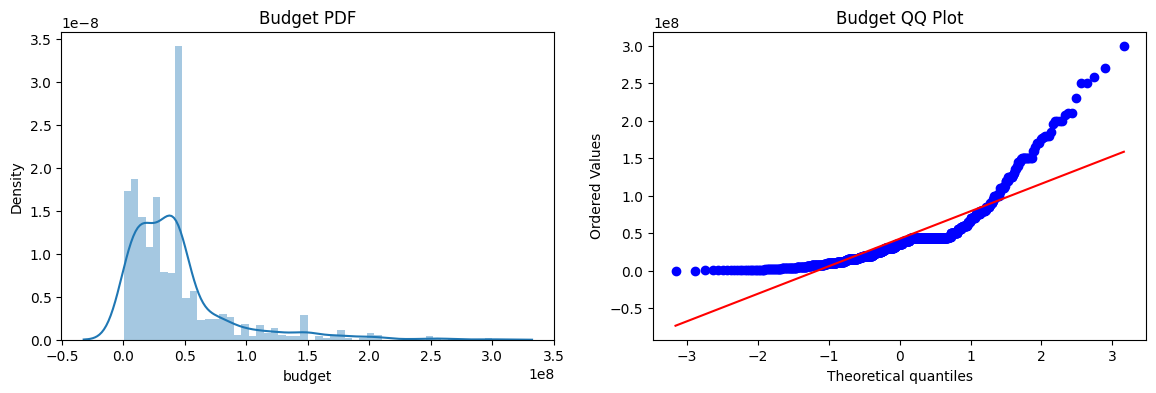

In [71]:
#To plot the Distribution and QQ plot before Transformation for budget col.
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['budget'])
plt.title('Budget PDF')

plt.subplot(122)
stats.probplot(X_train['budget'], dist="norm", plot=plt)
plt.title('Budget QQ Plot')

plt.show()
 #Here the show distribution is Right Skewed

In [72]:
print(y_train.shape)

(884, 1)


In [73]:
X_train.shape

(884, 2)

### **Fitting the data into models before applying the Transformation to check the accuracy**

In [75]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [77]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy LR 0.0
Accuracy DT 0.004524886877828055


### **After Applying the Transformer**

In [78]:
trf = FunctionTransformer(func=np.log1p)

In [79]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [80]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [81]:
#Checking the accuracy after applying the Transformation
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.0
Accuracy DT 0.004524886877828055


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
num_classes = len(np.unique(y))
print("Number of unique classes:", num_classes)

Number of unique classes: 1103


### **CrossVerifying the accuracy by using cross_validation_function**

In [86]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy')))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy')))


ValueError: n_splits=5 cannot be greater than the number of members in each class.

### **Plotting the QQ plot before and after transform for budget Col.**

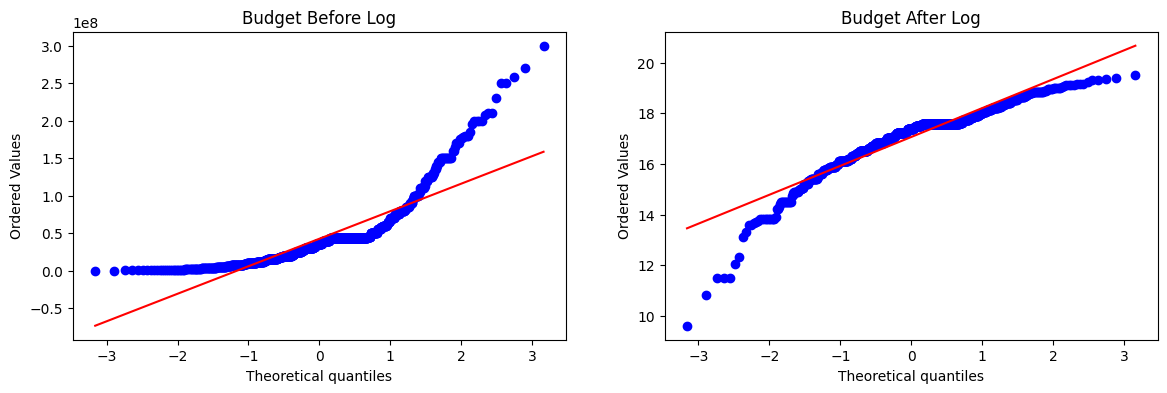

In [88]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['budget'], dist="norm", plot=plt)
plt.title('Budget Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['budget'], dist="norm", plot=plt)
plt.title('Budget After Log')

plt.show() #Positive impact

### **Plotting the QQ plot before and after transform for favorability Col.**

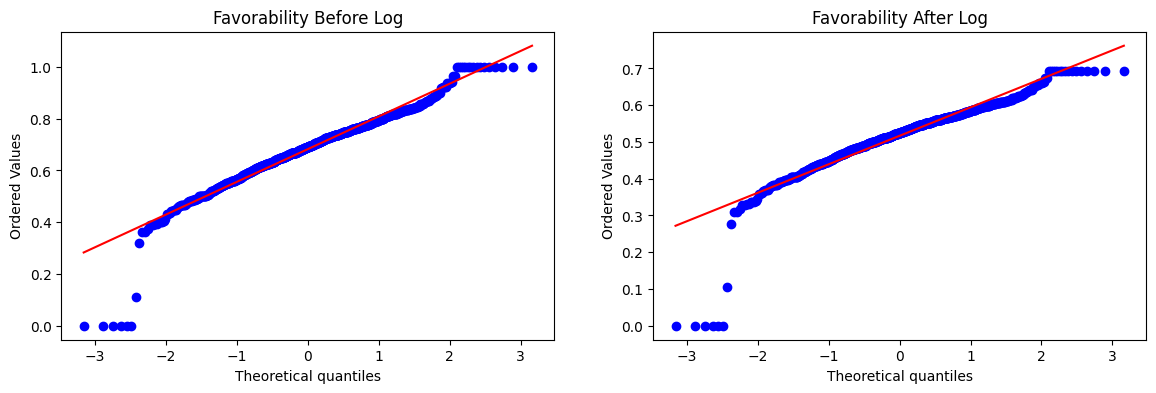

In [89]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['favorability'], dist="norm", plot=plt)
plt.title('Favorability Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['favorability'], dist="norm", plot=plt)
plt.title('Favorability After Log')

plt.show()

### **Transformation Applying on only Fare Col.**

In [24]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [26]:
#CrossValidation
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588389513108613


### **Applying various function transformation**

In [97]:
def apply_transform(transform):
   X=data.iloc[:, 0:2]
   y=data.iloc[:, 2:3]

   trf = ColumnTransformer([('log',FunctionTransformer(transform),['budget'])],remainder='passthrough')

   X_trans = trf.fit_transform(X)

   clf = LogisticRegression()

   #print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy')))

   plt.figure(figsize=(14,4))

   plt.subplot(121)
   stats.probplot(X['budget'], dist="norm", plot=plt)
   plt.title('Budegt Before Transform')

   plt.subplot(122)
   stats.probplot(X_trans[:,0], dist="norm", plot=plt)
   plt.title('Budget After Transform')

   plt.show()

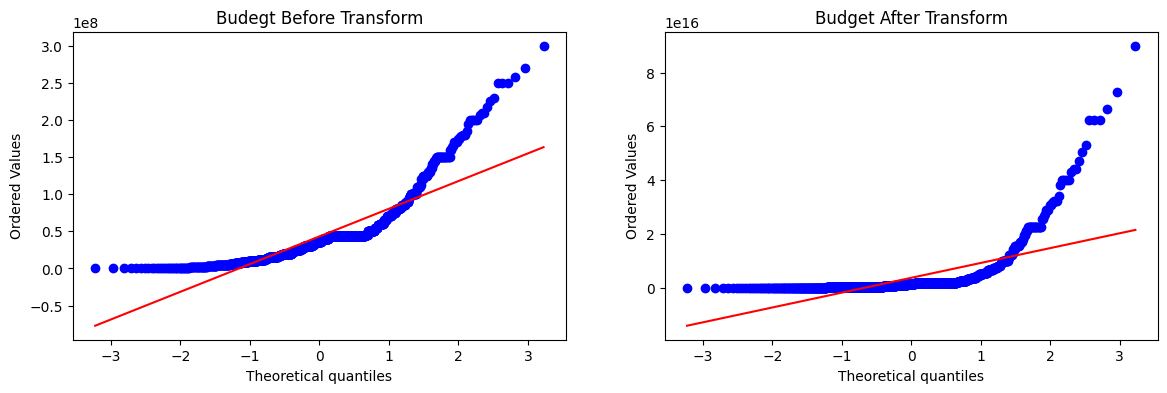

In [98]:
apply_transform(lambda x:x**2) #Square Transformation

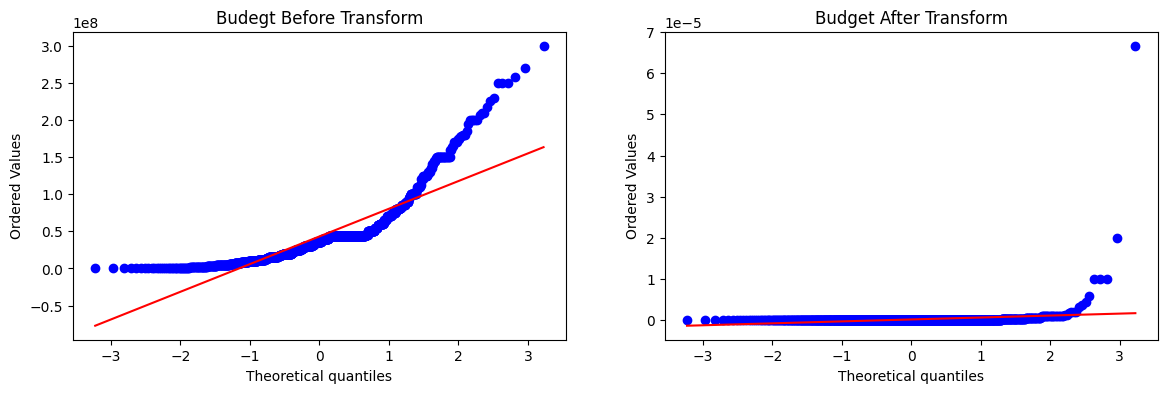

In [99]:
apply_transform(lambda x:1/(x+0.0001)) #Reciprocal Transformation

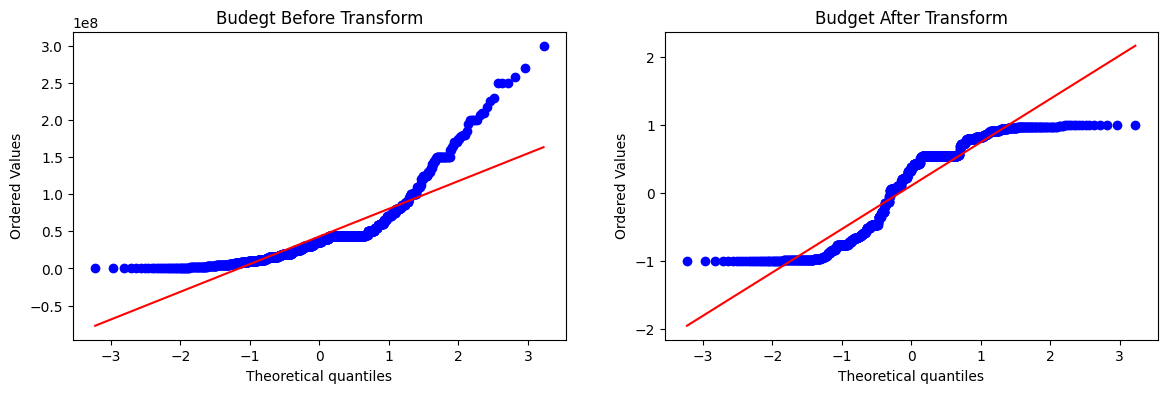

In [100]:
apply_transform(np.sin) #sine function transformation

In [106]:
def apply_transform(transform):
   X=data.iloc[:, 0:2]
   y=data.iloc[:, 2:3]

   trf = ColumnTransformer([('log',FunctionTransformer(transform),['favorability'])],remainder='passthrough')

   X_trans = trf.fit_transform(X)

   clf = LogisticRegression()

   #print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy')))

   plt.figure(figsize=(14,4))

   plt.subplot(121)
   stats.probplot(X['favorability'], dist="norm", plot=plt)
   plt.title('Favorability Before Transform')

   plt.subplot(122)
   stats.probplot(X_trans[:,0], dist="norm", plot=plt)
   plt.title('Favorability After Transform')

   plt.show()

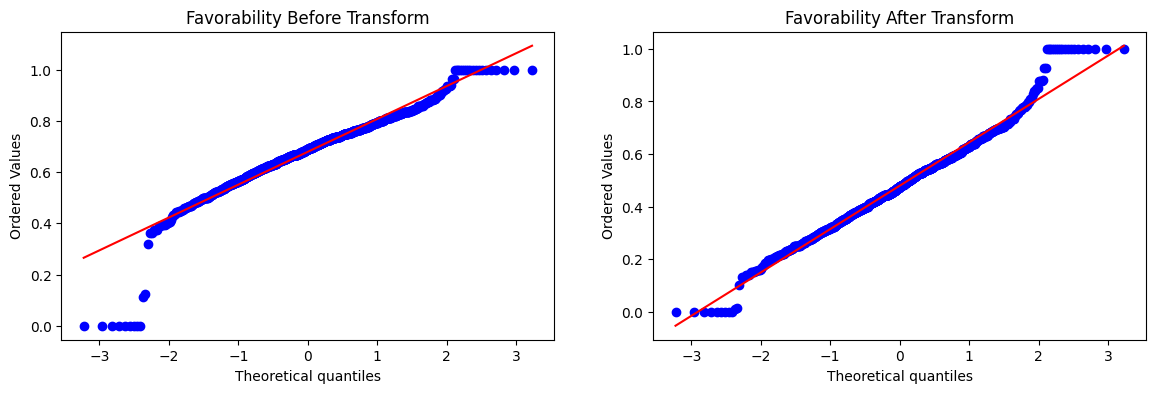

In [107]:
after_trans=apply_transform(lambda x:x**2) #Square Transformation

<ipython-input-110-982c00aea01f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['favorability'])


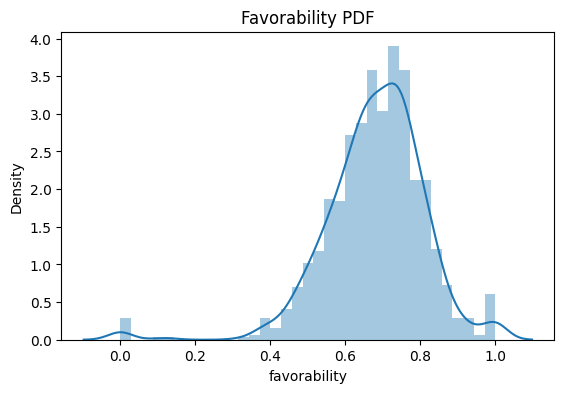

In [110]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['favorability'])
plt.title('Favorability PDF')

plt.show()